<a href="https://colab.research.google.com/github/AyushWaghale/ML-Practicals/blob/ayush/Practical4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

**Step 1: Load the Data**

In [3]:
df = pd.read_csv('iris-data.csv')

In [5]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]


**Step 2: Check for Missing Values**


In [7]:
print(df.isnull().sum())  # Check for missing values


sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


**Step 3: Encode Target Labels**

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])


**Step 4: Split Data into Training & Testing Sets**

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)  # Features
y = df['class']  # Target

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


**Train the Decision Tree Model using Entropy**

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Model
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on test data
y_pred = dt_model.predict(X_test)

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print(classification_report(y_test, y_pred))


Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Visualize decision tree**


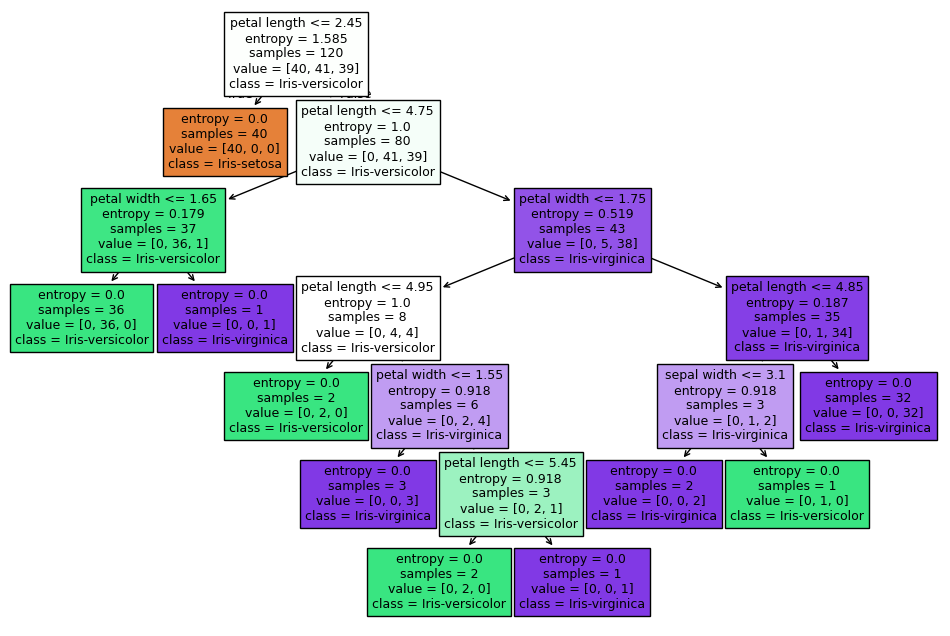

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.show()


**Train the Decision Tree Model using Gini Impurity**

In [24]:
# Initialize Decision Tree Model with Gini
dt_model2 = DecisionTreeClassifier(criterion="gini", random_state=42)

# Train the model
dt_model2.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [25]:
print(f"Accuracy with Gini: {accuracy_score(y_test, dt_model2.predict(X_test)):.2f}")


Accuracy with Gini: 1.00


**Visualize Decision tree**


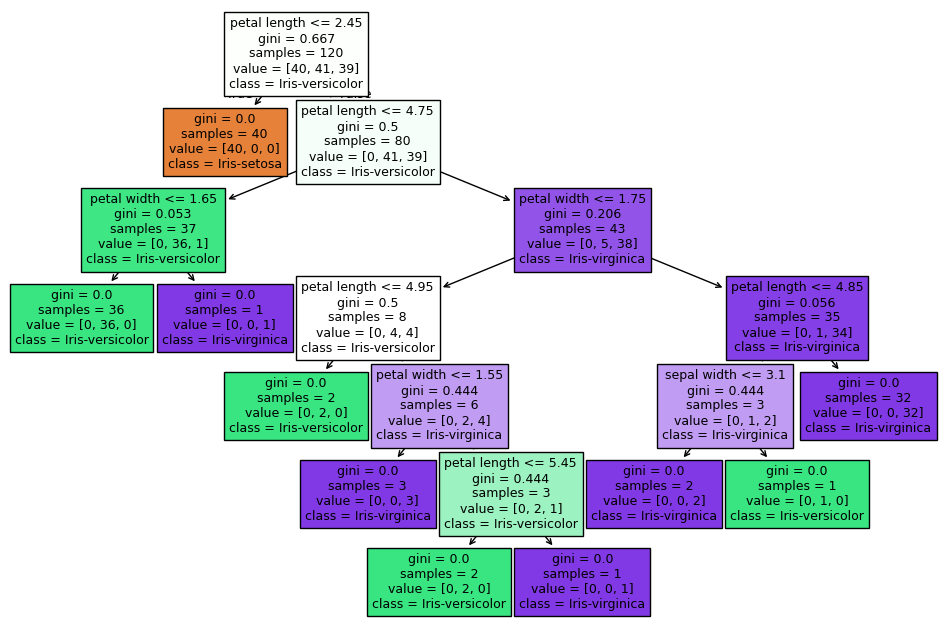

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_model2, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.show()


**Predict on a New Flower**

In [23]:
import numpy as np

# Example input: Sepal length, Sepal width, Petal length, Petal width
sample_flower = np.array([[5.1, 3.5, 1.4, 0.2]])

# Predict class
prediction = dt_model.predict(sample_flower)
predicted_species = label_encoder.inverse_transform(prediction)  # Convert back to species name

print(f"Predicted Species: {predicted_species[0]}")


Predicted Species: Iris-setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
